In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
allnames_df = pd.read_csv(r'./lfw_allnames.csv')
allnames_df['images'] = pd.to_numeric(allnames_df['images'])
allnames_df

,name,images
0,AJ_Cook,1
1,AJ_Lamas,1
2,Aaron_Eckhart,1
3,Aaron_Guiel,1
4,Aaron_Patterson,1
...,...,...
5744,Zorica_Radovic,1
5745,Zulfiqar_Ahmed,1
5746,Zumrati_Juma,1
5747,Zurab_Tsereteli,1


In [3]:
allnames_df.describe()

,images
count,5749.000000
mean,2.301792
std,9.016410
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,530.000000


In [5]:
def first_n_numimage(df, n):
    image_counts = df['images'].value_counts().sort_index().head(n)
    
    image_counts.plot(kind='bar')
    
    


def first_n_people_by_numimage(df, n):
    top_n = df.sort_values(by='images', ascending=False).head(n)

    top_n.plot(kind='barh', x='name', y='images')
    plt.title(f'Top {n} People by Number of Images')
    plt.xlabel('Number of Images')
    plt.ylabel('Name')

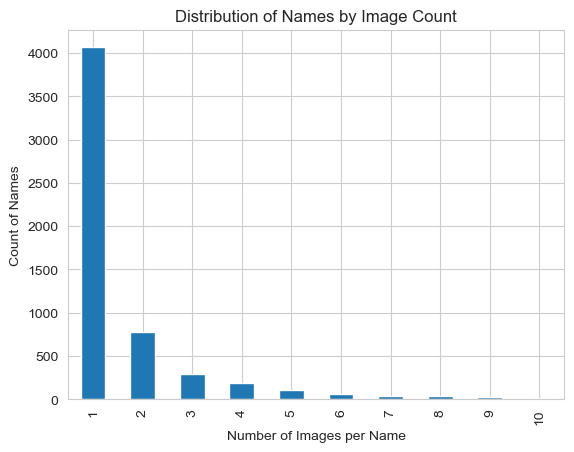

In [6]:
first_n_numimage(allnames_df, 10)

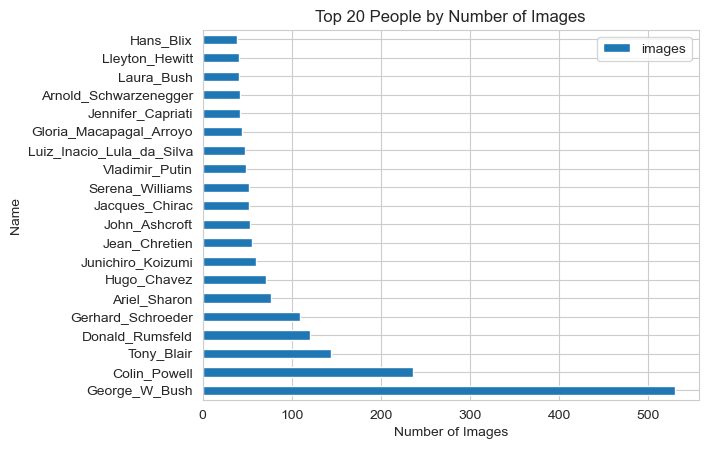

In [5]:
first_n_people_by_numimage(allnames_df, 20)

In [82]:
sample_pic = cv2.imread('./lfw-deepfunneled/lfw-deepfunneled/Aaron_Eckhart/Aaron_Eckhart_0001.jpg')
sample_pic.shape

(250, 250, 3)

In [18]:
filtered_df = allnames_df[allnames_df['images'] > 1]
images_per_person_filtered = filtered_df.groupby('name')['images'].sum().reset_index()
print(images_per_person_filtered.count())
images_per_person_filtered.to_csv('unbalancedDev.csv', index=False)

name      1680
images    1680
dtype: int64


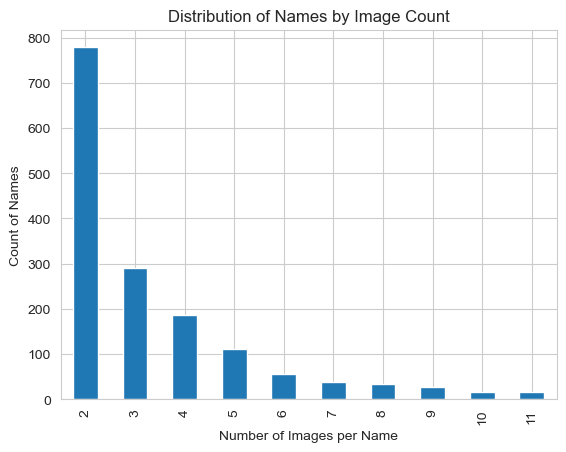

In [19]:
first_n_numimage(images_per_person_filtered, 10)

In [85]:
images_per_person_filtered.to_csv('unbalancedDev.csv', index=False)

In [11]:
def calc_percentile(df, target, operation):
    """
    Computes the percentage of rows in 'df' where 'images' meets a condition specified by 'operation' and 'target'.
    
    Parameters:
    - df: DataFrame with 'images' column.
    - target: Value(s) to compare against 'images'.
    - operation: 'less equal', 'greater', or 'in' to specify the comparison type.
    
    Returns:
    - Percentage of rows meeting the condition.
    """
    if operation == "less equal":
        operation += ' than'
        count_condition = (df['images'] <= target).sum()
    elif operation == "greater":
        operation += ' than'
        count_condition = (df['images'] > target).sum()
    elif operation == "in":
        count_condition = df['images'].isin(target).sum()
    else:
        raise Exception("Unknown Operation")
    total_rows = len(df)
    percentile = (count_condition / total_rows) * 100

    print(f"percentile of df {operation} {target} is {percentile}%")
    return percentile

In [9]:
calc_percentile(allnames_df, 1, 'less equal')

percentile of df less equal than 1 is 70.7775265263524%


70.7775265263524

In [12]:
calc_percentile(allnames_df, [2], 'in')

percentile of df in [2] is 13.55018264045921%


13.55018264045921

In [17]:
calc_percentile(allnames_df, 3, 'less equal')

percentile of df less equal than 3 is 89.38945903635414%


89.38945903635414

percentile of df less equal than 2 is 46.36904761904762%
percentile of df less equal than 3 is 63.69047619047619%
percentile of df less equal than 4 is 74.82142857142857%
percentile of df less equal than 5 is 81.48809523809524%
percentile of df less equal than 6 is 84.76190476190476%
percentile of df less equal than 7 is 87.08333333333333%
percentile of df less equal than 8 is 89.04761904761904%
percentile of df less equal than 9 is 90.5952380952381%
percentile of df less equal than 10 is 91.48809523809524%
percentile of df less equal than 11 is 92.44047619047619%
percentile of df less equal than 12 is 93.03571428571429%
percentile of df less equal than 13 is 93.69047619047619%
percentile of df less equal than 14 is 94.28571428571428%
percentile of df less equal than 15 is 94.94047619047619%
percentile of df less equal than 16 is 95.11904761904762%
percentile of df less equal than 17 is 95.5952380952381%
percentile of df less equal than 18 is 95.89285714285715%
percentile of df less eq

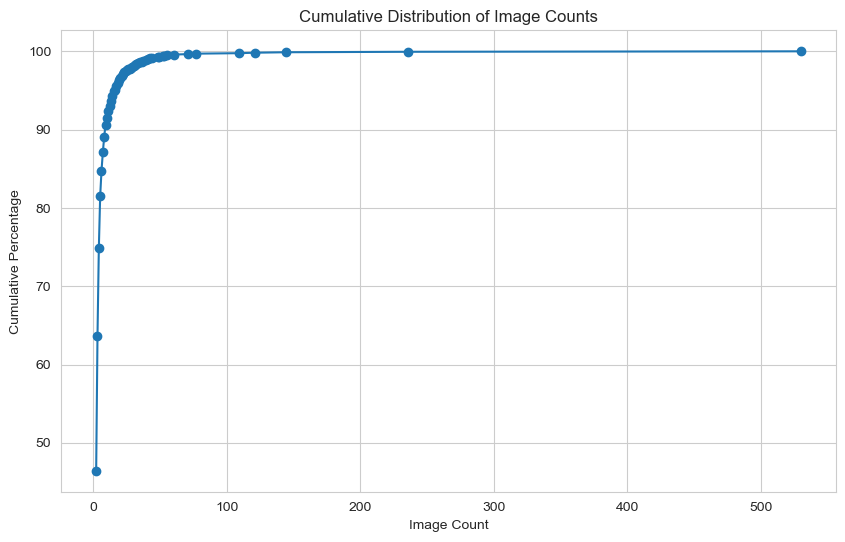

In [23]:
unique_values = sorted(images_per_person_filtered['images'].unique())
percentiles = [calc_percentile(images_per_person_filtered, value, 'less equal') for value in unique_values]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(unique_values, percentiles, marker='o')
plt.title('Cumulative Distribution of Image Counts')
plt.xlabel('Image Count')
plt.ylabel('Cumulative Percentage')
plt.grid(True)
plt.show()

percentile of df in [2] is 46.36904761904762%
percentile of df in [3] is 17.32142857142857%
percentile of df in [4] is 11.13095238095238%
percentile of df in [5] is 6.666666666666667%
percentile of df in [6] is 3.273809523809524%
percentile of df in [7] is 2.3214285714285716%
percentile of df in [8] is 1.9642857142857142%
percentile of df in [9] is 1.5476190476190477%
percentile of df in [10] is 0.8928571428571428%
percentile of df in [11] is 0.9523809523809524%
percentile of df in [12] is 0.5952380952380952%
percentile of df in [13] is 0.6547619047619048%
percentile of df in [14] is 0.5952380952380952%
percentile of df in [15] is 0.6547619047619048%
percentile of df in [16] is 0.17857142857142858%
percentile of df in [17] is 0.4761904761904762%
percentile of df in [18] is 0.2976190476190476%
percentile of df in [19] is 0.4166666666666667%
percentile of df in [20] is 0.2976190476190476%
percentile of df in [21] is 0.2380952380952381%
percentile of df in [22] is 0.2976190476190476%
perc

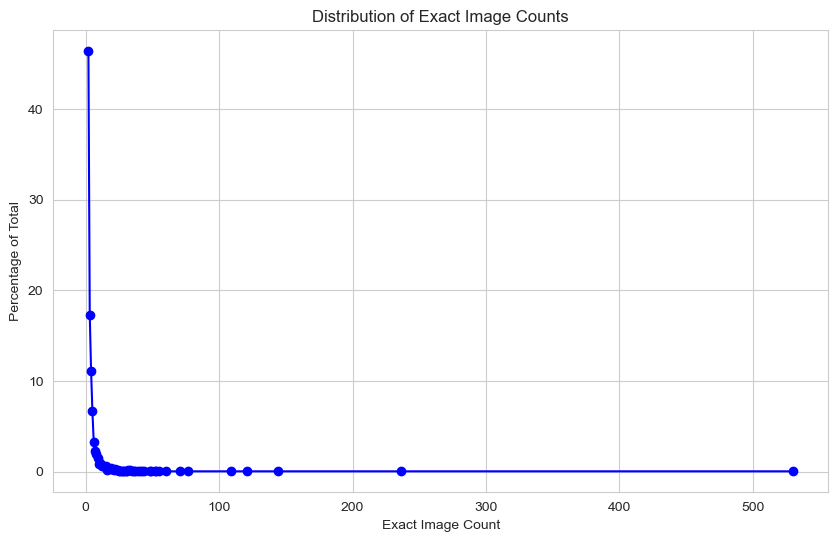

In [22]:
percentiles_non_cumulative = [calc_percentile(images_per_person_filtered, [value], 'in') for value in unique_values]

# Plotting the non-cumulative distribution
plt.figure(figsize=(10, 6))
plt.plot(unique_values, percentiles_non_cumulative, marker='o', linestyle='-', color='b')
plt.title('Distribution of Exact Image Counts')
plt.xlabel('Exact Image Count')
plt.ylabel('Percentage of Total')
plt.grid(True)
plt.show()